# Feature Engineering Strategy

- One-Hot Encoding for Categorical Variables: `Geography` and `Gender` will be transformed into dummy variables, removing one of the columns to avoid multicollinearity;
- New feature - `Age Group`: Grouping customers by age range (e.g., up to 30, 30-45, 45-60, +60) can help the model capture differences in behavior.
- New feature - `BalanceSalaryRatio`: Ratio between balance and estimated salary: `Balance / EstimatedSalary`. Can indicate possible customer profiles with greater or lesser dependence on the bank.
- New Feature - `TenureByAge`: Ratio between balance and estimated salary: Proportion of tenure in relation to age: `Tenure / Age`. May reflect the amount of loyalty the customer has proportional to their banking history.
- New Feature - `IsWealthy`: Customers with a balance and salary above R$100,000 are marked as high-income customers. This may influence their behavior with the bank.
- New Feature - `OneProductCostumer`: Customers with only one product and **no credit card** may represent a group with low engagement or minimal relationship with the institution.
- New Feature - `HasZeroBalance`: Customers with a zero balance may indicate a lack of interest in actively using the account — a possible sign of churn.


In [19]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt 
import seaborn as sn

import os


In [10]:
data_path = '../data/interim/churn_cleaned.csv'
df_feat = pd.read_csv(data_path)

In [11]:
# feature - AgeGroup
bins = [0, 30, 40, 50, 60, 100]
labels = ['<30', '30-40', '40-50', '50-60', '60+']
df_feat['AgeGroup'] = pd.cut(df_feat['Age'], bins=bins, labels=labels)

pd.crosstab(df_feat['AgeGroup'], df_feat['Exited'], normalize='index')

Exited,0,1
AgeGroup,,
<30,0.924797,0.075203
30-40,0.879128,0.120872
40-50,0.660345,0.339655
50-60,0.437892,0.562108
60+,0.752155,0.247845


In [12]:
df_feat = pd.get_dummies(df_feat, columns=['Gender', 'Geography'], drop_first=True)
df_feat['BalanceSalaryRatio'] = df_feat['Balance'] / (df_feat['EstimatedSalary'] + 1)
df_feat['IsWealthy'] = ((df_feat['Balance'] > 100000) & (df_feat['EstimatedSalary'] > 100000)).astype(int)
df_feat['OneProductCostumer'] = ((df_feat['NumOfProducts'] == 1) & (df_feat['HasCrCard'] == 0)).astype(int)
df_feat['TenureGroup'] = pd.cut(df_feat['Tenure'], bins=[-1, 2, 5, 10], labels=['0-2', '3-5', '6-10'])
df_feat['HasZeroBalance'] = (df_feat['Balance'] == 0).astype(int)

In [13]:
df_feat.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,Gender_Male,Geography_Germany,Geography_Spain,BalanceSalaryRatio,IsWealthy,OneProductCostumer,TenureGroup,HasZeroBalance
0,619,42,2.0,0.00,1,1,1,101348.88,1,40-50,False,False,False,0.000000,0,0,0-2,1
1,608,41,1.0,83807.86,1,0,1,112542.58,0,40-50,False,False,True,0.744670,0,1,0-2,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,40-50,False,False,False,1.401362,1,0,6-10,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,30-40,False,False,False,0.000000,0,0,0-2,1
4,850,43,2.0,125510.82,1,1,1,79084.10,0,40-50,False,False,True,1.587035,0,0,0-2,0


In [20]:
#Scaling continuous features
cols_to_scale = [
    'CreditScore', 'Age', 'Tenure',
    'Balance', 'EstimatedSalary',
    'BalanceSalaryRatio'
]
scaler = StandardScaler()
df_feat[cols_to_scale] = scaler.fit_transform(df_feat[cols_to_scale])

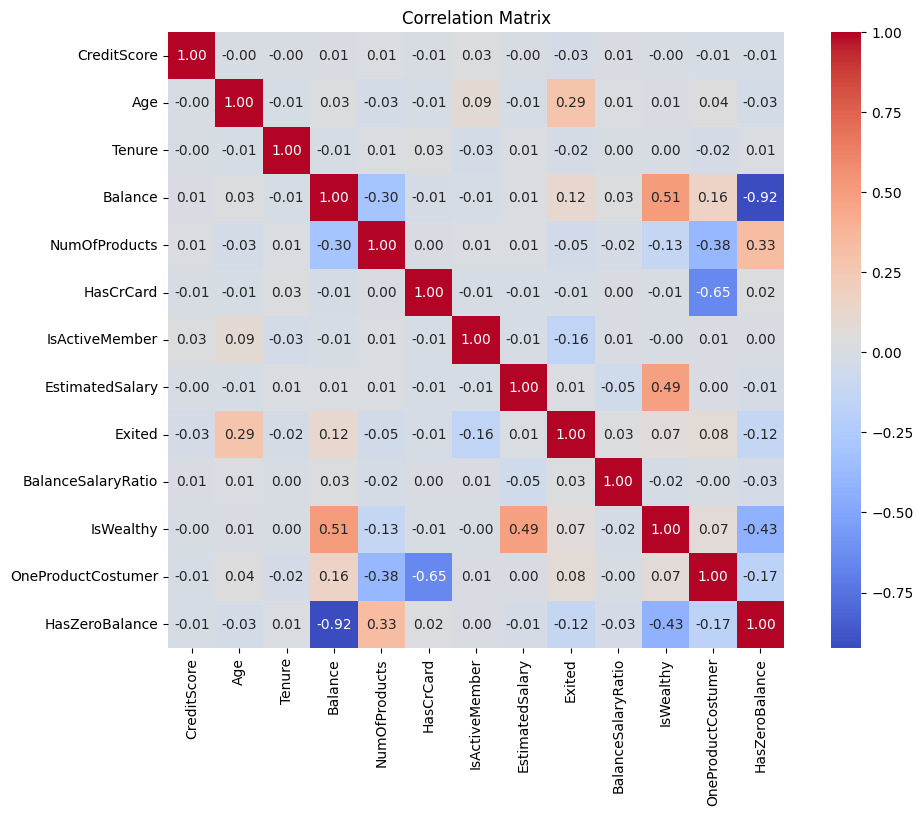

In [40]:
#New Correlation analysis

plt.figure(figsize=(12, 8))
numeric_df = df_feat.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.savefig('../reports/fig_correlation_matrix_feat.png', bbox_inches='tight')
plt.show()

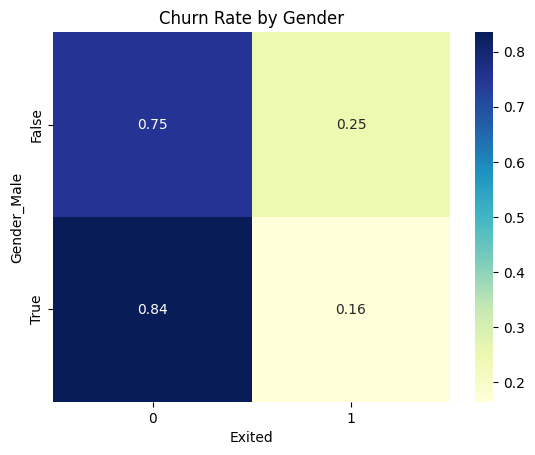

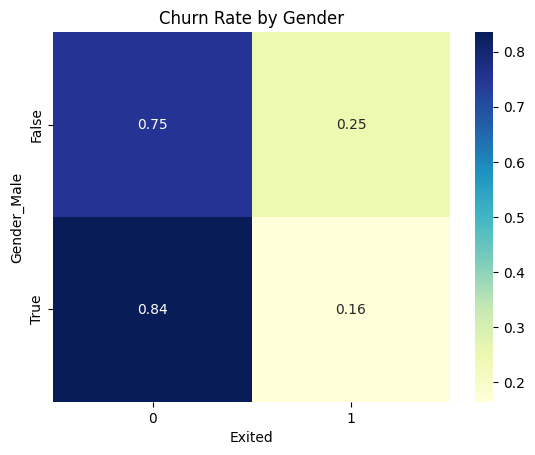

In [29]:
cross_gender_male = pd.crosstab(df_feat['Gender_Male'], df_feat['Exited'], normalize='index')

sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Churn Rate by Gender")
plt.xlabel("Exited")
plt.ylabel("Gender_Male")
plt.show()

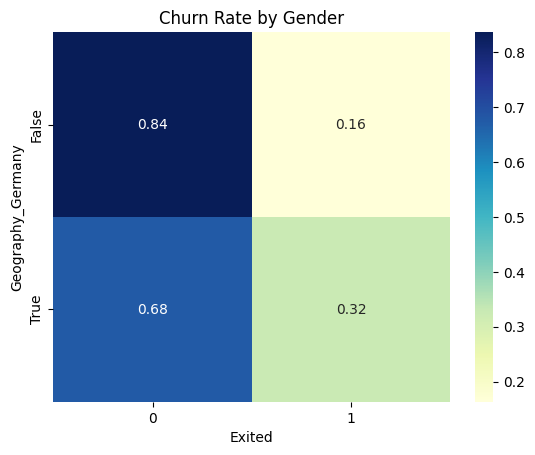

In [33]:
cross_geo_germany = pd.crosstab(df_feat['Geography_Germany'], df_feat['Exited'], normalize='index')

sns.heatmap(cross_geo_germany, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Churn Rate by Gender")
plt.xlabel("Exited")
plt.ylabel("Geography_Germany")
plt.show()

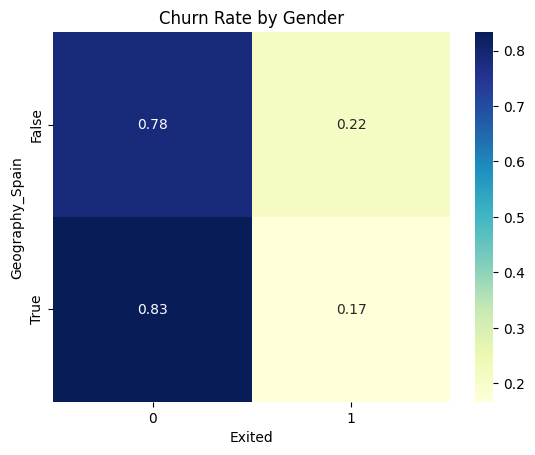

In [34]:
cross_geo_spain = pd.crosstab(df_feat['Geography_Spain'], df_feat['Exited'], normalize='index')

sns.heatmap(cross_geo_spain, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Churn Rate by Gender")
plt.xlabel("Exited")
plt.ylabel("Geography_Spain")
plt.show()

In [ ]:
df_feat.shape
df_feat.to_csv('../data/processed/df_ready.csv', index=False)

In [39]:
print(df_feat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CreditScore         10000 non-null  float64 
 1   Age                 10000 non-null  float64 
 2   Tenure              10000 non-null  float64 
 3   Balance             10000 non-null  float64 
 4   NumOfProducts       10000 non-null  int64   
 5   HasCrCard           10000 non-null  int64   
 6   IsActiveMember      10000 non-null  int64   
 7   EstimatedSalary     10000 non-null  float64 
 8   Exited              10000 non-null  int64   
 9   AgeGroup            10000 non-null  category
 10  Gender_Male         10000 non-null  bool    
 11  Geography_Germany   10000 non-null  bool    
 12  Geography_Spain     10000 non-null  bool    
 13  BalanceSalaryRatio  10000 non-null  float64 
 14  IsWealthy           10000 non-null  int64   
 15  OneProductCostumer  10000 non-null  i